# Household Location Choice Model (HLCM) for Single and Multi Family Housing  


Arezoo Besharati, Paul Waddell, UrbanSim, July 2018 

This notebook demonstrates the use of the LargeMultinomialLogit model template to construct, estimate, and evaluate a Household Location Choice Model for the San Francisco Bay Area.

In the process of developing the model, we also demonstrate some data checking and transformations to improve the model.

The model structure and specification are informed and limited by the available data, which is based on the data used by the Metropolitan Transportation Commission for their operational model.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Initialize-Networks" data-toc-modified-id="Initialize-Networks-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Initialize Networks</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Perform-desired-variable-creations-and-transformations¶" data-toc-modified-id="Perform-desired-variable-creations-and-transformations¶-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Perform desired variable creations and transformations¶</a></span></li><li><span><a href="#Check-Distributions" data-toc-modified-id="Check-Distributions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Check Distributions</a></span></li><li><span><a href="#Check-for-Multicollinearity" data-toc-modified-id="Check-for-Multicollinearity-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Check for Multicollinearity</a></span></li></ul></li><li><span><a href="#Model-Estimation" data-toc-modified-id="Model-Estimation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Estimation</a></span><ul class="toc-item"><li><span><a href="#HLCM-for-Multi-Family" data-toc-modified-id="HLCM-for-Multi-Family-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>HLCM for Multi-Family</a></span></li><li><span><a href="#HLCM-for-Single-Family" data-toc-modified-id="HLCM-for-Single-Family-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>HLCM for Single-Family</a></span></li></ul></li></ul></div>

## Preliminaries

In [1]:
import os; os.chdir('../../')
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import warnings;
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
import orca
import seaborn as sns
%matplotlib notebook

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load data

In [5]:
# Load any script-based Orca registrations
from scripts import datasources
from scripts import models

In [6]:
orca.list_tables()
#orca.list_steps()

['parcels',
 'buildings',
 'craigslist',
 'rentals',
 'nodessmall',
 'nodeswalk',
 'units',
 'households',
 'persons',
 'jobs']

In [7]:
orca.broadcast('nodeswalk', 'rentals', cast_index=True, onto_on='node_id_walk')
orca.broadcast('nodeswalk', 'parcels', cast_index=True, onto_on='node_id_walk')
orca.broadcast('nodessmall', 'rentals', cast_index=True, onto_on='node_id_small')
orca.broadcast('nodessmall', 'parcels', cast_index=True, onto_on='node_id_small')
orca.list_broadcasts()

[('parcels', 'buildings'),
 ('buildings', 'units'),
 ('units', 'households'),
 ('households', 'persons'),
 ('nodeswalk', 'rentals'),
 ('nodeswalk', 'parcels'),
 ('nodessmall', 'rentals'),
 ('nodessmall', 'parcels')]

In [ ]:
#mm.list_steps()

In [ ]:
#mm.initialize()

### Initialize Networks

Note that we have separately created a set of network accessibility variables and stored them. They are registered a orca objects.

In [ ]:
#%%capture
#orca.run(["initialize_network_walk"])

In [ ]:
#%%capture
#orca.run(["initialize_network_small"])

### Explore the data

In [ ]:
nodeswalk = orca.get_table('nodeswalk').to_frame()
nodessmall = orca.get_table('nodessmall').to_frame()

In [ ]:
nodeswalk.describe().transpose()

In [ ]:
nodessmall.describe().transpose()

In [ ]:
parcel = orca.get_table('parcels').to_frame()
parcel.columns

In [9]:
bld = orca.get_table('buildings').to_frame()
bld.columns

Index(['parcel_id', 'development_type_id', 'improvement_value',
       'residential_units', 'residential_sqft', 'sqft_per_unit',
       'non_residential_sqft', 'building_sqft', 'nonres_rent_per_sqft',
       'res_price_per_sqft', 'stories', 'year_built', 'redfin_sale_price',
       'redfin_sale_year', 'redfin_home_type', 'costar_property_type',
       'costar_rent', 'building_type_id', 'res_sqft_per_unit'],
      dtype='object')

In [52]:
hh = orca.get_table('households').to_frame()
hh.columns.tolist()

['serialno',
 'persons',
 'building_type',
 'cars',
 'income',
 'race_of_head',
 'hispanic_head',
 'age_of_head',
 'workers',
 'state',
 'county',
 'tract',
 'block_group',
 'children',
 'tenure',
 'recent_mover',
 'block_group_id',
 'single_family',
 'unit_id',
 'building_id',
 'income_k',
 'white',
 'black',
 'asian',
 'hispanic',
 'elderly',
 'single',
 'hh_random',
 'rich',
 'poor',
 'has_children']

In [57]:
np.random.seed(12345)
hh['hh_random'] = np.random.uniform(0,1,len(hh))

In [ ]:
hh.head()

In [ ]:
hh.describe()

In [ ]:
hh.dtypes

In [78]:
hh_sf = hh[(hh['building_type'] == 2)  & (hh['recent_mover'] == 1) \
         & (hh['income'] > 0) & (hh['income'] < 1000000)]
len(hh_sf)

23839

In [79]:
len(hh_sf.building_id.unique())

21399

In [80]:
sf_tmp = pd.DataFrame(hh_sf.building_id.unique(), columns=['building_id'])
sf_tmp['sf_choice_set'] = 1
sf_tmp = sf_tmp.set_index('building_id')
#sf_tmp.head()

,sf_choice_set
building_id,
1579641,1
309589,1
647210,1
479369,1
1417430,1


In [81]:
mf_tmp = pd.DataFrame(hh_mf.building_id.unique(), columns=['building_id'])
mf_tmp['mf_choice_set'] = 1
mf_tmp = mf_tmp.set_index('building_id')
#mf_tmp.head()

,mf_choice_set
building_id,
1365640,1
409168,1
1365633,1
309587,1
647202,1


In [86]:
 bld2 = bld.merge(sf_tmp, how='left', left_index=True, right_index=True)

In [92]:
bld2.sf_choice_set= bld2.sf_choice_set.fillna(0)
bld2.sf_choice_set.value_counts()

0.00    1802831
1.00      21398
Name: sf_choice_set, dtype: int64

In [124]:
hh_mf = hh[(hh['building_type'] > 2) & (hh['recent_mover'] == 1) \
         & (hh['income'] > 0) & (hh['income'] < 500000)]
len(hh_mf)

76942

In [125]:
len(hh_mf.building_id.unique())

40857

In [126]:
bld3 = bld2.merge(mf_tmp, how='left', left_index=True, right_index=True)
bld3.mf_choice_set= bld3.mf_choice_set.fillna(0)
bld3.mf_choice_set.value_counts()

0.00    1809475
1.00      14754
Name: mf_choice_set, dtype: int64

In [127]:
orca.add_table('buildings', bld3)

In [ ]:
parcel.describe().transpose()

In [ ]:
bld.describe().transpose()

In [ ]:
df = orca.merge_tables(target = 'buildings', tables = ['buildings','parcels','nodeswalk','nodessmall'])

In [ ]:
df.describe().transpose()

In [ ]:
hh_f.dtypes

In [ ]:
hh_f_data = hh_f.merge(df, left_on='building_id', right_index=True)

In [ ]:
hh_f_data.describe().transpose()

In [ ]:
hh_f.head()

In [ ]:
#bld.groupby('building_type_id')['residential_units'].sum()

In [ ]:
#bld.describe().transpose()

In [ ]:
#bld.quantile(.99)

In [ ]:
#bld[['residential_units','residential_sqft', 'non_residential_sqft']].sum()

In [ ]:
#bld.building_type_id.value_counts()

In [ ]:
# hh_sf=hh[hh['building_type']==2]
# hh_mf=hh[hh['building_type']!=2]

### Data Cleaning

In [23]:
nodeswalk = orca.get_table('nodeswalk').to_frame()
nodessmall = orca.get_table('nodessmall').to_frame()
#print(nodeswalk.columns.tolist())
#print(nodessmall.columns.tolist())

In [47]:
nodeswalk['pop_jobs_ratio_1500_walk'] = nodeswalk['pop_1500_walk'] / (nodeswalk['jobs_500_walk']+1)
nodessmall['pop_jobs_ratio_10000'] = nodessmall['pop_10000'] / (nodessmall['jobs_10000'] + 1)
nodessmall['pop_jobs_ratio_25000'] = nodessmall['pop_25000'] / (nodessmall['jobs_25000'] + 1)
nodeswalk['avg_hhs_500_walk'] = nodeswalk['pop_500_walk'] / (nodeswalk['hh_500_walk']+1)
nodeswalk['avg_hhs_1500_walk'] = nodeswalk['pop_1500_walk'] / (nodeswalk['hh_1500_walk']+1)


In [48]:
orca.add_table('nodeswalk', nodeswalk)
orca.add_table('nodessmall', nodessmall)

In [ ]:
#nodessmall.describe().transpose()

In [ ]:
# nodessmall_upper = nodessmall.quantile(.99)
#nodessmall_upper

In [ ]:
# nodessmall_clipped = nodessmall.clip_upper(nodessmall_upper, axis=1) 
# nodessmall_clipped.describe().transpose()
# orca.add_table('nodessmall', nodessmall_clipped);

In [ ]:
# nodeswalk.describe().transpose()
# nodeswalk_upper = nodeswalk.quantile(.99)
#nodeswalk_upper

In [ ]:
# nodeswalk_clipped = nodeswalk.clip_upper(nodeswalk_upper, axis=1) 
# nodeswalk_clipped.describe().transpose()
# orca.add_table('nodeswalk', nodeswalk_clipped);

### Perform desired variable creations and transformations¶

In [128]:
# scale income and create race dummies
hh.income_k = hh.income/1000
hh.white = (hh.race_of_head == 1).astype(int)
hh.black = (hh.race_of_head == 2).astype(int)
hh.asian = (hh.race_of_head == 6).astype(int)
hh.hisp = (hh.hispanic_head == 'yes').astype(int)
hh.single = (hh.persons == 1).astype(int)
hh.elderly = (hh.age_of_head > 65).astype(int)
hh.rich = (hh.income > 150000).astype(int)
hh.poor = (hh.income < 40000).astype(int)
hh.has_children = (hh.children > 0).astype(int)
  
# building_type dummies
bld.single_family = (bld.building_type_id == 1).astype(int)
bld.multi_family = (bld.building_type_id == 3).astype(int)
bld.mixed_use = (bld.building_type_id > 3).astype(int)

# add the columns

orca.add_column('households', 'income_k', hh.income_k)
orca.add_column('households', 'white', hh.white)
orca.add_column('households', 'black', hh.black)
orca.add_column('households', 'asian', hh.asian)
orca.add_column('households', 'hispanic', hh.hisp)
orca.add_column('households', 'elderly', hh.elderly)
orca.add_column('households', 'rich', hh.rich)
orca.add_column('households', 'poor', hh.poor)
orca.add_column('households', 'has_children', hh.has_children)

orca.add_column('households', 'hh_random', hh.hh_random)

orca.add_column('buildings', 'single_family', bld.single_family)
orca.add_column('buildings', 'multi_family', bld.multi_family)
orca.add_column('buildings', 'mixed_use', bld.mixed_use);

### Check Distributions

In [ ]:
# hh_income_upper = hh_singlefamily.income.quantile(0.99)
# len(hh[hh['income']>hh_income_upper])

In [ ]:
# %matplotlib notebook
# hh_sf.income.plot(kind='hist',bins=100)
# print(hh_sf.income.quantile([0.10,0.5,0.9,0.99,1]))

In [ ]:
# %matplotlib notebook
# hh_mf.income.plot(kind='hist',bins=100)
# print(hh_mf.income.quantile([0.10,0.5,0.9,0.99,1]))

In [ ]:
# %matplotlib notebook
# ax = sns.boxplot(x = hh_sf.income,palette="Set2", width=0.5)

In [ ]:
# %matplotlib notebook
# ax = sns.boxplot(x = hh_mf.income,palette="Set2", width=0.5)

In [111]:
df = orca.merge_tables(target = 'buildings', tables = ['buildings','parcels','nodeswalk','nodessmall'])
#df.columns.tolist()
df_sf= df[df['residential_units']==1]
df_mf= df[df['residential_units']>1]

In [ ]:
# %matplotlib notebook
# df_sf.avg_income_1500_walk.plot(kind='hist',bins=100)
# plt.show()
# print(df_sf.avg_income_1500_walk.quantile([0.10,0.5,0.9,0.99,1]))

In [ ]:
# %matplotlib notebook
# df_mf.avg_income_1500_walk.plot(kind='hist',bins=100)
# plt.show()
# print(df_mf.avg_income_1500_walk.quantile([0.10,0.5,0.9,0.99,1]))

In [ ]:
#%matplotlib notebook
#(df_mf.prop_black_500_walk).plot(kind='hist',bins=100)
#(df_mf.prop_asian_500_walk).plot(kind='hist',bins=100)
#(df_mf.prop_white_500_walk).plot(kind='hist',bins=100)
#(df_mf.prop_hisp_500_walk).plot(kind='hist',bins=100)


### Check for Multicollinearity

In [ ]:
# %matplotlib inline
# plt.subplots(figsize=(20, 20))


# # Create correlation matrix
# corr_matrix = df_sf.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# high_corr = [column for column in upper.columns if any(upper[column] > 0.98)]
# X= df_sf[high_corr]
# sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

In [ ]:
# %matplotlib inline
# plt.subplots(figsize=(20, 20))

# corr_matrix = df_mf.corr()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
# X= df_mf[high_corr]
# plt.subplots(figsize=(20, 20))
# sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

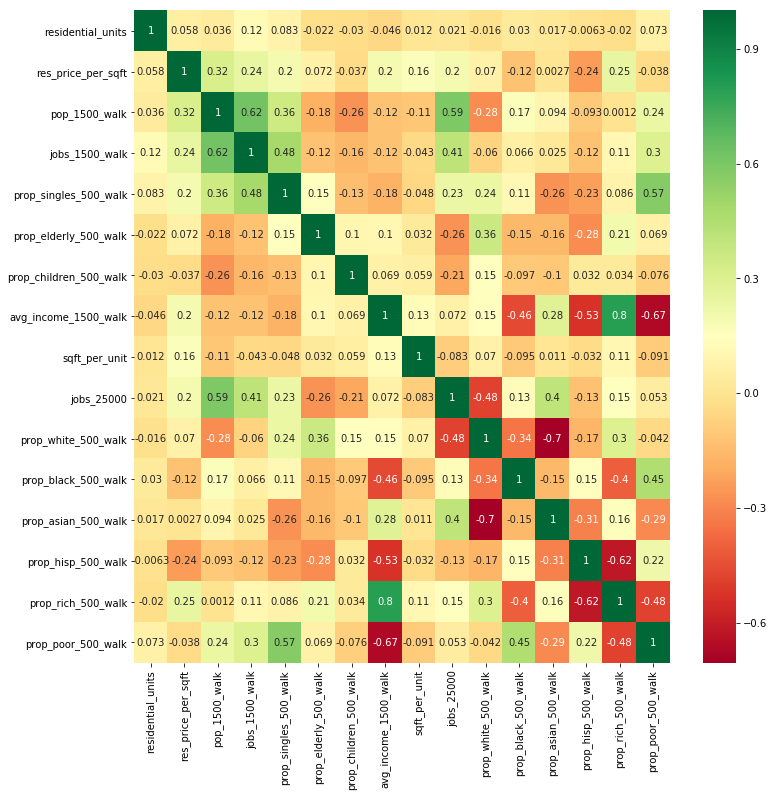

In [112]:
%matplotlib inline

selected_features = ['residential_units','res_price_per_sqft', 'pop_1500_walk', 'jobs_1500_walk',
                     'prop_singles_500_walk','prop_elderly_500_walk','prop_children_500_walk',
                     'avg_income_1500_walk', 'sqft_per_unit',
                     'jobs_25000','prop_white_500_walk','prop_black_500_walk','prop_asian_500_walk',
                     'prop_hisp_500_walk','prop_rich_500_walk','prop_poor_500_walk']

X = df_mf[selected_features]

plt.subplots(figsize=(12, 12))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Model Estimation

## Large Choice Set Single-Family 

In [114]:
%%time
m1 = LargeMultinomialLogitStep()
m1.choosers = ['households']
m1.alternatives = ['buildings','parcels','nodeswalk','nodessmall']
m1.choice_column = 'building_id'
m1.alt_sample_size = 50

#Filters on choosers
m1.chooser_filters = ['building_type == 2 & recent_mover == 1 & 0 <income < 1000000']

#Filters on alternatives
m1.alt_filters = ['residential_units == 1',
                 '0 < avg_income_500_walk < 500000',
                 'sqft_per_unit > 0']


m1.model_expression = ' \
np.log1p(res_price_per_sqft) + \
np.log1p(income):np.log1p(res_price_per_sqft) + \
persons:np.log1p(sqft_per_unit) + \
pop_jobs_ratio_25000 + \
persons:avg_hhs_500_walk + \
rich:prop_rich_500_walk + \
poor:prop_poor_500_walk + \
single:prop_singles_500_walk + \
elderly:prop_elderly_500_walk + \
white:prop_white_500_walk + \
black:prop_black_500_walk + \
asian:prop_asian_500_walk + \
hispanic:prop_hisp_500_walk\
- 1'

m1.name = 'hlcm'
m1.tags = ['single_family', 'test']
m1.fit()

                  CHOICEMODELS ESTIMATION RESULTS                  
Dep. Var.:                chosen   No. Observations:         15,768
Model:         Multinomial Logit   Df Residuals:             15,755
Method:       Maximum Likelihood   Df Model:                     13
Date:                 2018-07-22   Pseudo R-squ.:             0.132
Time:                      17:09   Pseudo R-bar-squ.:         0.132
AIC:                 107,081.926   Log-Likelihood:      -53,527.963
BIC:                 107,181.580   LL-Null:             -61,684.779
                                                   coef   std err         z     P>|z|   Conf. Int.
--------------------------------------------------------------------------------------------------
np.log1p(res_price_per_sqft)                    -1.9378     0.030   -63.829     0.000             
np.log1p(income):np.log1p(res_price_per_sqft)    0.1668     0.003    64.294     0.000             
persons:np.log1p(sqft_per_unit)                  0.0058     

In [115]:
len(m1._get_df(tables=m.choosers, filters=m.chooser_filters))

23102

## Large Choice Set Multi-Family 

In [131]:
%%time
m2 = LargeMultinomialLogitStep()
m2.choosers = ['households']
m2.alternatives = ['buildings','parcels','nodeswalk','nodessmall']
m2.choice_column = 'building_id'
m2.alt_sample_size = 50

#Filters on choosers
m2.chooser_filters = ['building_type > 2 &\
                      recent_mover == 1 &\
                      0 <income < 500000']

#Filters on alternatives
m2.alt_filters = ['residential_units > 1',
                 '0 < avg_income_500_walk < 500000',
                 'pop_1500_walk > 0',
                 'sqft_per_unit > 0']

# m.alt_filters = ['mf_choice_set == 1']

#


m2.model_expression = ' np.log(residential_units) + \
np.log1p(res_price_per_sqft) + \
np.log1p(income):np.log1p(res_price_per_sqft) + \
persons:np.log1p(sqft_per_unit) + \
np.log1p(jobs_1500_walk) + \
np.log1p(jobs_25000) + \
rich:prop_rich_500_walk + \
poor:prop_poor_500_walk + \
single:prop_singles_500_walk + \
elderly:prop_elderly_500_walk + \
white:prop_white_500_walk + \
black:prop_black_500_walk + \
asian:prop_asian_500_walk + \
hispanic:prop_hisp_500_walk\
- 1'

m2.name = 'hlcm'
m2.tags = ['multi_family','test']
m2.fit()

                  CHOICEMODELS ESTIMATION RESULTS                   
Dep. Var.:                chosen   No. Observations:          52,244
Model:         Multinomial Logit   Df Residuals:              52,230
Method:       Maximum Likelihood   Df Model:                      14
Date:                 2018-07-22   Pseudo R-squ.:              0.421
Time:                      17:40   Pseudo R-bar-squ.:          0.421
AIC:                 236,857.523   Log-Likelihood:      -118,414.761
BIC:                 236,981.614   LL-Null:             -204,379.730
                                                   coef   std err         z     P>|z|   Conf. Int.
--------------------------------------------------------------------------------------------------
np.log(residential_units)                        1.1956     0.004   332.745     0.000             
np.log1p(res_price_per_sqft)                    -0.2391     0.016   -15.391     0.000             
np.log1p(income):np.log1p(res_price_per_sqft)    0.0

In [132]:
len(m2._get_df(tables=m2.choosers, filters=m2.chooser_filters))

76942

## Constrained Choice Set Single_Family

In [119]:
%%time
m3 = LargeMultinomialLogitStep()
m3.choosers = ['households']
m3.alternatives = ['buildings','parcels','nodeswalk','nodessmall']
m3.choice_column = 'building_id'
m3.alt_sample_size = 50

#Filters on choosers
m3.chooser_filters = ['building_type == 2 & recent_mover == 1 & 0 <income < 1000000']

m3.alt_filters = ['sf_choice_set == 1 & sqft_per_unit > 0']

# np.log(residential_units) +
# np.log(income):np.log(avg_income_500_walk) + \
# np.log1p(income):np.log1p(rich_1500_walk) + \
# np.log1p(income):np.log1p(poor_1500_walk) + \
# np.log1p(persons):np.log1p(sqft_per_unit) + \

m3.model_expression = ' \
np.log1p(res_price_per_sqft) + \
np.log1p(income):np.log1p(res_price_per_sqft) + \
pop_jobs_ratio_25000 + \
np.log(jobs_25000+1) + \
persons:avg_hhs_500_walk + \
rich:prop_rich_500_walk + \
poor:prop_poor_500_walk + \
single:prop_singles_500_walk + \
elderly:prop_elderly_500_walk + \
white:prop_white_500_walk + \
black:prop_black_500_walk + \
asian:prop_asian_500_walk + \
hispanic:prop_hisp_500_walk\
- 1'

m3.name = 'hlcm'
m3.tags = ['single_family', 'test']
m3.fit()

                  CHOICEMODELS ESTIMATION RESULTS                  
Dep. Var.:                chosen   No. Observations:         22,458
Model:         Multinomial Logit   Df Residuals:             22,445
Method:       Maximum Likelihood   Df Model:                     13
Date:                 2018-07-22   Pseudo R-squ.:             0.109
Time:                      17:18   Pseudo R-bar-squ.:         0.109
AIC:                 156,528.738   Log-Likelihood:      -78,251.369
BIC:                 156,632.990   LL-Null:             -87,856.213
                                                   coef   std err          z     P>|z|   Conf. Int.
---------------------------------------------------------------------------------------------------
np.log1p(res_price_per_sqft)                    -3.8649     0.028   -136.047     0.000             
np.log1p(income):np.log1p(res_price_per_sqft)    0.3263     0.002    147.783     0.000             
pop_jobs_ratio_25000                             0.0413 

In [117]:
len(m3._get_df(tables=m3.choosers, filters=m3.chooser_filters))

23839

## Constrained Choice Set Multi_Family

In [129]:
%%time
m4 = LargeMultinomialLogitStep()
m4.choosers = ['households']
m4.alternatives = ['buildings','parcels','nodeswalk','nodessmall']
m4.choice_column = 'building_id'
m4.alt_sample_size = 50

#Filters on choosers
m4.chooser_filters = ['building_type > 2 &\
                      recent_mover == 1 &\
                      0 <income < 500000']

#Filters on alternatives
m4.alt_filters = ['residential_units > 1',
                 '0 < avg_income_500_walk < 500000',
                 'sqft_per_unit > 0',
                 'mf_choice_set == 1']


m4.model_expression = ' np.log(residential_units) + \
np.log1p(res_price_per_sqft) + \
np.log1p(income):np.log1p(res_price_per_sqft) + \
persons:np.log1p(sqft_per_unit) + \
np.log1p(jobs_1500_walk) + \
np.log1p(jobs_25000) + \
rich:prop_rich_500_walk + \
poor:prop_poor_500_walk + \
single:prop_singles_500_walk + \
elderly:prop_elderly_500_walk + \
white:prop_white_500_walk + \
black:prop_black_500_walk + \
asian:prop_asian_500_walk + \
hispanic:prop_hisp_500_walk\
- 1'

m4.name = 'hlcm'
m4.tags = ['multi_family','test']
m4.fit()

                  CHOICEMODELS ESTIMATION RESULTS                   
Dep. Var.:                chosen   No. Observations:          31,881
Model:         Multinomial Logit   Df Residuals:              31,867
Method:       Maximum Likelihood   Df Model:                      14
Date:                 2018-07-22   Pseudo R-squ.:              0.203
Time:                      17:36   Pseudo R-bar-squ.:          0.203
AIC:                 198,727.499   Log-Likelihood:       -99,349.749
BIC:                 198,844.676   LL-Null:             -124,719.205
                                                   coef   std err         z     P>|z|   Conf. Int.
--------------------------------------------------------------------------------------------------
np.log(residential_units)                        0.6708     0.003   192.230     0.000             
np.log1p(res_price_per_sqft)                     0.1114     0.018     6.254     0.000             
np.log1p(income):np.log1p(res_price_per_sqft)   -0.0

In [133]:
len(m4._get_df(tables=m4.choosers, filters=m4.chooser_filters))

76942